# Importing Necessary Libraries


In [3]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

from operator import itemgetter, attrgetter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


# Import Data
- Getting Data
- Unzip data

In [4]:
! wget -P ../../data/raw https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

--2020-10-26 05:44:03--  https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘../../data/raw/churn-in-telecoms-dataset.10’

churn-in-telecoms-d     [ <=>                ]  50.22K  --.-KB/s    in 0.02s   

2020-10-26 05:44:03 (2.62 MB/s) - ‘../../data/raw/churn-in-telecoms-dataset.10’ saved [51427]



In [5]:
! unzip -o ../../data/raw/"bigml_59c28831336c6604c800002a.csv.zip"

unzip:  cannot find or open ../../data/raw/bigml_59c28831336c6604c800002a.csv.zip, ../../data/raw/bigml_59c28831336c6604c800002a.csv.zip.zip or ../../data/raw/bigml_59c28831336c6604c800002a.csv.zip.ZIP.


#  Overview, Understanding of Data and Business Question.

In this dat set, SyriaTel company has data about their Customers such as how much they use, what plan they have and more importantly how many left their plan, and how many stayed in thier business.

in this data set, churn customers are marked as positiver or 1, and stayed( current) customers negative or 0. What they want from this data set is to predict customers who are going to leave the plan, and keep this number as low as possible.

The prediction of this data set is:

True Negative (TN) == meaning of stayed custmoers
True Positive (TP) == meaning of left customers
False Negative (FN) == predicted stayed but customers already left
False Positive (FP) == predicted left but customers stayed
What we want to reduce here is FN and FP. With Higher F1_score we reduce the FN and FP that we can have the most accurate number on TN which is stayed customers.

----

# Making Data Frame and Cleaning Data

In [6]:
# making dataset with pandas
df = pd.read_csv('../../data/raw/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# change the churn column from boolian to numbers 0 and 1
df['churn'] = df['churn'].astype(int)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


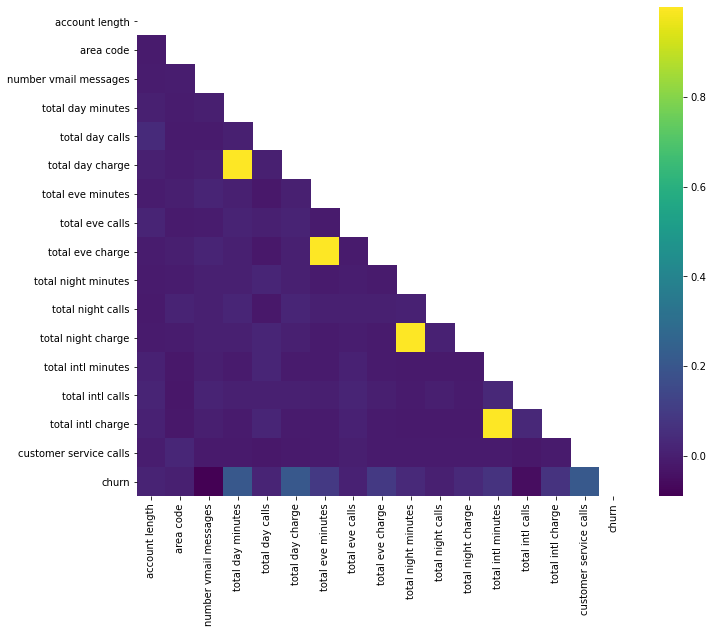

In [8]:
# using heat map to show the correlation between columns and churn
corr = df.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [9]:
# check if there is any missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# checking for any dupicate values
df.duplicated().value_counts()

False    3333
dtype: int64

In [11]:
# checking the value of churn column
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [12]:
# check the numbers in all cloumns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Making Target

In [13]:
# making target or on churn.
# drop the churn column from the original dataset.
df.churn.value_counts()
X= df.drop('churn', axis=1)
y = df.churn

In [14]:
# checking valus on new data frame.
X.dtypes.value_counts()

int64      8
float64    8
object     4
dtype: int64

-----

## Train Test Split

In [15]:
# split our data to test and train sets. 
# we make our model on train sets.
# we do not touch our test set untill the last part.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print(X_train.shape)
print(y_train.shape)

(2666, 20)
(2666,)


In [16]:
# checking all columns in our new dataset(X).
X_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [17]:
# we drop 4 object columns to have all numeric columns.
# we drop the phone number column.
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2


## Dealing with Categorical Columns 

In [18]:
# making those object(categorical) cloumns from last cell into numeric.

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_tr_cat = X_train[['state', 'area code', 'international plan', 'voice mail plan']]

X_tr_oh = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names(X_tr_cat.columns), index=X_tr_cat.index)
X_tr_ = X_tr_num.join(X_tr_oh)
X_tr_

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,7.24,6.0,3,1.62,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,8.31,9.2,5,2.48,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,10.29,9.9,6,2.67,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Scaling Data 


In [19]:
# we scale our data to avoid the power of bigger numbers.
ss = StandardScaler()
X_train_sc = pd.DataFrame(ss.fit_transform(X_tr_), index=X_tr_.index, columns=X_tr_.columns)
X_train_sc

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,3.601382,-0.584936,-1.547653,-0.429657,-1.547170,-0.729987,-1.840891,-0.731087,1.255804,0.925634,1.256197,-1.300791,0.634849,-1.304132,0.318978,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,6.705633,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,-0.994016,1.739882,0.326624,-0.326624,0.611162,-0.611162
1373,0.184951,-0.584936,-1.244014,0.224176,-1.244071,-0.138082,0.499864,-0.139179,0.165090,-0.353704,0.164841,-2.194793,-0.184370,-2.191525,1.813519,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,7.464811,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,1.006020,-0.574752,0.326624,-0.326624,0.611162,-0.611162
679,-0.650176,-0.584936,0.787609,-1.133785,0.787772,2.491952,0.549667,2.493068,0.147339,0.209205,0.147309,-0.549828,1.863677,-0.549186,-0.428293,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,6.647288,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,1.006020,-0.574752,-3.061624,3.061624,0.611162,-0.611162
56,1.020079,-0.584936,-0.969818,-0.127888,-0.970200,-0.408385,-1.890695,-0.408439,-1.178086,1.437368,-1.176344,-0.800149,-1.003589,-0.800835,-0.428293,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,6.765496,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,1.006020,-0.574752,0.326624,-0.326624,0.611162,-0.611162
1993,-0.371801,-0.584936,0.675354,-0.228477,0.675192,1.294330,-1.143645,1.295326,0.265680,0.516246,0.265649,-2.051753,-0.593980,-2.045833,-1.175564,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.

## Smote Imbalanced Data


In [20]:
# we use Smote to making balance in our dataset.
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train_sc, y_train.ravel())

----

# Modeling 

Logistic Regression

after we made our dataset ready fro making models, we made our all models from classification models. 
We start with Logistic Regression and the after making few models, this is the best F1_score we got. [0.78162366, 0.77673546, 0.80348259]
But, the problem here was the higher number of FP which we do not want to have.

We did the same process for KNN and Decision Tree, and we did not get any better F1 scores than Logistic Regression.


Random Forest

The first Random Forest model that we made showed a better F1 score with lower numbers in FP and FN. With Grid Search and using different parameters, we made the best train model with Random Forest.

## Our Best Random Forest Model

In [21]:
# using Grid Search and different parameters at the same time to get the best f1 score.
param_grid = { 'criterion': ['gini', 'entropy'],'max_depth': [2,5,10],'n_estimators': [100, 1000]}

rf2 = GridSearchCV(RandomForestClassifier(class_weight='balanced', criterion='entropy'), param_grid=param_grid)
rf2.fit(X_train_sc, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10], 'n_estimators': [100, 1000]})

In [22]:
# this shows our best parameter ( Estimator )
rf2.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=1000)

In [23]:
# we use corss_val to find F1 score
cross_val_score(rf2, X_train_sc, y_train, cv=3, scoring='f1')

array([0.74285714, 0.74235808, 0.76521739])

In [24]:
# mean of F1 score
sum([0.74285714, 0.74235808, 0.76521739]) / 3

0.7501442033333334

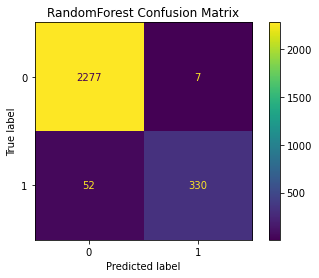

In [25]:
# using confusion matrix graph to see TN, TP, FN and FP
second_rand = plot_confusion_matrix(rf2.best_estimator_, X_train_sc, y_train)
plt.title('RandomForest Confusion Matrix');

As we can see from the above, our model reduces the number of FN and FP while we see higher number in TN which is the number of remaining Customers.
We used this model to creat our final model on test set.

----

# Final Model

## Using Test Set to Make Final Models

now we do the same steps as we did on train set to make our test set ready for the final model.

In [26]:
# checking all columns again
X_test.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [28]:
# checking on type of columns.
X_test.dtypes.value_counts()

int64      8
float64    8
object     4
dtype: int64

In [29]:
# Dropping object columns to get all numeric columns.
X_test_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_test_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,113,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,67,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,98,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,147,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,96,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,157,0,185.1,92,31.47,213.0,85,18.11,196.1,85,8.82,8.5,5,2.30,2
2763,116,19,155.7,104,26.47,185.4,118,15.76,192.7,116,8.67,8.2,2,2.21,3
3069,148,26,158.7,91,26.98,160.5,127,13.64,218.3,88,9.82,9.9,3,2.67,1
1468,75,27,117.5,102,19.98,206.8,127,17.58,194.4,114,8.75,4.2,7,1.13,3


## Dealing with Categorical Columns

In [30]:
# changing our categorical ( object) columns to 0 and 1.
X_test_cat = X_test[['state', 'area code', 'international plan', 'voice mail plan']]

X_test_oh = pd.DataFrame(ohe.transform(X_test_cat), columns=ohe.get_feature_names(X_test_cat.columns), index=X_test_cat.index)
X_test_ = X_test_num.join(X_test_oh)
X_test_

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,113,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,67,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,98,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,147,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,96,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,157,0,185.1,92,31.47,213.0,85,18.11,196.1,85,8.82,8.5,5,2.30,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2763,116,19,155.7,104,26.47,185.4,118,15.76,192.7,116,8.67,8.2,2,2.21,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3069,148,26,158.7,91,26.98,160.5,127,13.64,218.3,88,9.82,9.9,3,2.67,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,75,27,117.5,102,19.98,206.8,127,17.58,194.4,114,8.75,4.2,7,1.13,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## Scaling our Test Set

In [31]:
# Scale our data to avoid the power of big numbers.
X_test_sc = pd.DataFrame(ss.transform(X_test_), index=X_test_.index, columns=X_test_.columns)
X_test_sc

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,0.311486,-0.584936,-0.452712,-0.379362,-0.452767,2.562980,0.300651,2.562705,-0.219520,1.181501,-0.220859,1.166657,-0.593980,1.172620,-0.428293,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163000,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,6.534900,-0.584569,-0.994016,1.739882,0.326624,-0.326624,0.611162,-0.611162
2674,-0.852632,-0.584936,-1.297381,0.827714,-1.297113,0.329524,1.197110,0.329704,-0.239243,2.102624,-0.238391,0.916336,0.634849,0.920971,-1.175564,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,7.719515,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163000,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,1.006020,-0.574752,0.326624,-0.326624,0.611162,-0.611162
1345,-0.068118,-0.584936,-3.305080,-5.056782,-3.305141,-0.810881,1.495930,-0.810008,-0.659356,-0.609571,-0.659155,-1.229270,-1.413199,-1.224664,1.813519,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163000,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,7.090080,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,-0.584569,1.006020,-0.574752,0.326624,-0.326624,0.611162,-0.611162
1957,1.171920,-0.584936,0.610946,-1.083490,0.611325,0.067112,-0.446399,0.067408,-0.874343,0.669766,-0.873920,-0.013427,-1.003589,-0.019400,-0.428293,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,7.464811,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163000,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,1.710661,-0.994016,-0.574752,0.326624,-0.326624,0.611162,-0.611162
2148,-0.118732,-0.584936,-0.655138,0.073292,-0.655194,0.473554,-1.342858,0.473619,0.535893,-0.456051,0.537392,-0.084947,1.044458,-0.085623,-0.428293,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.138

## We Use our Best Train Model 

In [46]:
# using rf2 which is our best train model.
final_model = rf2

In [50]:
# fit our test set into our best train model.
# get the score on our test set.
final_model.fit(X_train_sc, y_train)
final_model.score(X_test_sc, y_test)

0.9460269865067467

In [51]:
# getting our best F1 score.
f1_score(y_test, rf2.predict(X_test_sc))

0.8043478260869565

In [52]:
# getting y value or target.
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

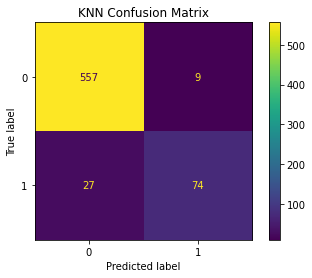

In [53]:
# showing the final numbers with confusion matrix.
final_model_conf = plot_confusion_matrix(rf2, X_test_sc, y_test)
plt.title('KNN Confusion Matrix');
plt.savefig('first_knn.pdf')

----

# Results and Recommendations

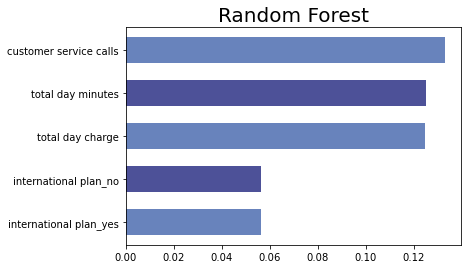

In [56]:
# getting features Importance to discussing our project
cv_rand_summary = list(zip(X_tr_.columns, rf2.best_estimator_.feature_importances_))
cv_rand_summary = sorted(cv_rand_summary,key=itemgetter(1), reverse=True)
cv_rand_summary

cv_rand_ylabel = [i[0] for i in cv_rand_summary][:5]
cv_rand_xlabel = [i[1] for i in cv_rand_summary][:5]
fig, ax = plt.subplots()
ax.barh(cv_rand_ylabel, cv_rand_xlabel, height=0.6, color=['#6883BC', '#4D5198'])
ax.invert_yaxis()
ax.axes.set_title('Random Forest', fontsize=20);

As the above bar suggests, the number of customer service call is the most important reason to churn. The more customer service calls, the more people leave the plan. 
What we see here is that other featurs such as taotal day minutes and total day charge are the second most important reason to have more churn. 
We recommend the SyriaTell company to work on total day charge and total day minutes, and making promotions on these two features. We want to make sure that they get these offers to all peopel especially those who call customer service.